In [292]:

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString

import dask

In [306]:
gdf = gpd.read_file("labeled_trajectories-all.geoJSON")
gdf.shape[0]

2223

In [307]:
gdf.head()

,object_id,cluster,geometry
0,533.0,1,"LINESTRING (-35.967 -19.440, -36.006 -19.437, ..."
1,552.0,1,"LINESTRING (-45.764 -18.971, -46.132 -19.208, ..."
2,558.0,0,"LINESTRING (-51.352 -16.412, -50.948 -16.372, ..."
3,563.0,0,"LINESTRING (-51.918 -19.011, -51.901 -18.987, ..."
4,606.0,1,"LINESTRING (-51.486 -18.207, -51.108 -18.214, ..."


In [308]:
def interpolate_linestring(line, x):
    """
    Interpolate a Shapely LineString with a specified number of points.

    :param line: Shapely LineString
    :param x: Number of points for interpolation

    :return : Interpolated LineString
    """
    if x <= 1:
        raise ValueError("Number of points (x) must be greater than 1.")

    # Calculate the total length of the LineString
    total_length = line.length
    interp_distance = total_length / (x - 1)

    # Interpolate points along the LineString
    interpolated_points = [
        line.interpolate(i * interp_distance)
        for i in range(x)
        ]

    # Create a new LineString from the interpolated points
    interpolated_line = LineString(interpolated_points)

    return interpolated_line

In [309]:
clusters = []
geometry = []

k = 3

for cluster in range(11):
    original = list(gdf[gdf['cluster']==cluster]['geometry'])
    for traj in original:
        length = len(traj.xy[0])
        traj = interpolate_linestring(traj, length*k)
        points = list(zip(*traj.xy))  # Extract points directly and transpose
        for j in range(k): 
            new_list = points[j::k]
            line = LineString(new_list)
            geometry.append(line)
            clusters.append(cluster)

fake = gpd.GeoDataFrame({'cluster': clusters, 'geometry': geometry})


In [312]:
fake['object_id'] = None
all_data = pd.concat([gdf, fake])
all_data['fake'] = all_data['object_id'].apply(lambda x: 1 if pd.isna(x) else 0)
#all_data.shape
#all_data
all_data.to_file('fake3.geoJSON', driver='GeoJSON')

c:\Users\anape\Downloads\outsight\venv\Lib\site-packages\geopandas\array.py:1486: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 / Pseudo-Mercator (the single non-null crs provided).
  warnings.warn(


<Axes: >

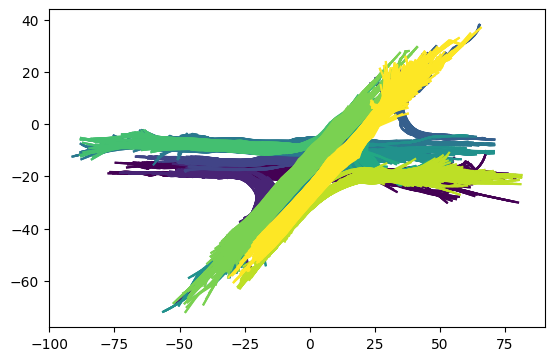

In [ ]:
#gdf.plot(column='cluster')
all_data.plot(column='cluster')